#     COURSE: Linear algebra: theory and implementation
##    SECTION: Vectors

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Algebraic and geometric interpretations
---


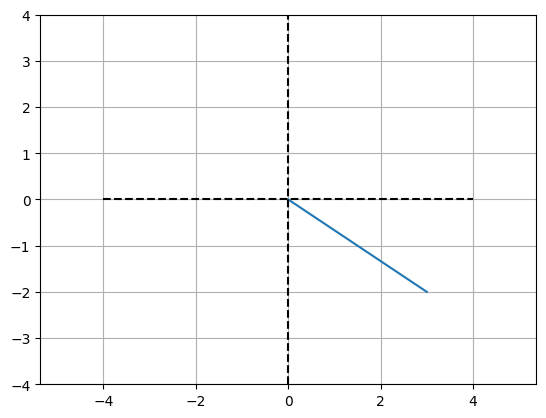

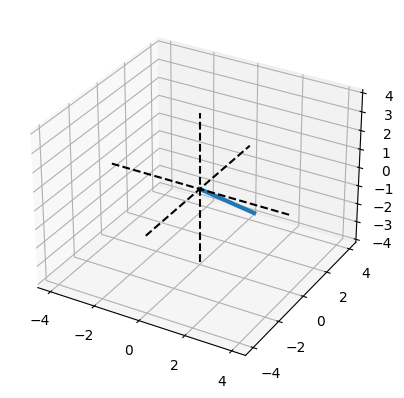

In [3]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)


# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()


# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()


---
# VIDEO: Vector addition/subtraction
---


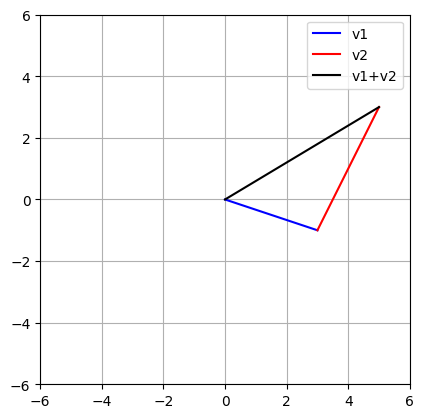

In [4]:

# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])

v3 = v1 + v2


# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()



---
# VIDEO: Vector-scalar multiplication
---


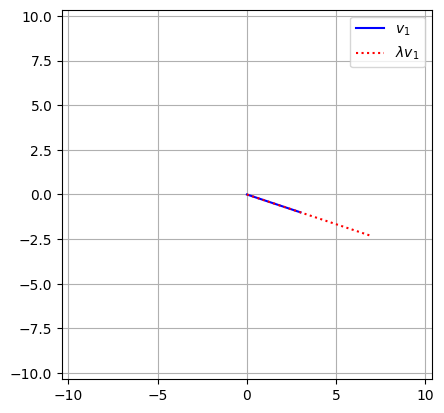

In [5]:
# vector and scalar
v1 = np.array([ 3, -1 ])
l  = 2.3
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='$v_1$')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='$\lambda v_1$')

plt.legend()
plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid()
plt.show()


---
# VIDEO: Vector-vector multiplication: the dot product
---


In [6]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5 ])
v2 = np.array([ 0, -4,  -3, 6, 5 ])

# method 1
dp1 = sum( np.multiply(v1,v2) )

# method 2
dp2 = np.dot( v1,v2 )

# method 3
dp3 = np.matmul( v1,v2 )

# method 4
dp4 = 0  # initialize

# loop over elements
for i in range(len(v1)):
    
    # multiply corresponding element and sum
    dp4 = dp4 + v1[i]*v2[i]


print(dp1,dp2,dp3,dp4)

32 32 32 32


# VIDEO: Dot product properties: associative and distributive

In [7]:
## Distributive property

# create random vectors
n = 10
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , (b+c) )
res2 = np.dot(a,b) + np.dot(a,c)

# compare them
print([ res1,res2 ])

[-1.6613053563742195, -1.6613053563742195]


In [8]:
## Associative property

# create random vectors
n = 5
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , np.dot(b,c) )
res2 = np.dot( np.dot(a,b) , c )

# compare them, Dot product is not associative
print(res1)
print(res2)


### special cases where associative property works!
# 1) one vector is the zeros vector
# 2) a==b==c


[ 0.16031485 -0.21693163 -0.00582619 -0.09903632 -0.10653403]
[ 0.20851588 -0.5273392  -0.04070783 -0.25236268  0.88621875]


In [9]:
# Code Challenge: dot products and with matrix columns
m = 4
n = 6
A = np.random.randn(m, n)
B = np.random.randn(m, n)

print(A)
print()
print(B)

dot_product = np.zeros(n)

for i in range(n):
    dot_product[i] = np.dot(A[:, i], B[:, i])
print()
print(dot_product)

[[ 0.14985212  0.56535584 -1.22385319 -0.36014662  1.47438081 -0.71437464]
 [-0.10927726  1.26274523  0.84706502 -2.63557932  0.13299445 -0.43343813]
 [-0.0427682  -1.15155659  1.11805555 -0.88779248  0.99726849  2.92794671]
 [-0.60233412 -0.3579167   1.73010717  1.25056677  0.80075858 -0.33270334]]

[[-1.06971513  0.08301457 -0.4487509  -2.46911094  0.39359392 -0.54397177]
 [ 1.55680321  0.53282166 -0.11901112  1.67046633 -0.71837586 -1.05941542]
 [-1.36132857 -1.07343031 -1.45120031 -0.15028901  0.75597939 -0.98247597]
 [-0.70057493  2.25748527  0.07654857  0.42507253  0.45846623 -2.00474507]]

[ 0.14977949  1.14787485 -1.04169028 -2.84839753  1.60580251 -1.36186124]


In [11]:
# Code Challenge: is the dot product commutative
# a'*b == b'*a

a = np.random.randn(100)
b = np.random.randn(100)

# compute a'b and b'a, test for equality
dp_ab = np.dot(a, b)
dp_ba = np.dot(b, a)
print(dp_ab, dp_ba, dp_ab-dp_ba)

# test with 2-element random vectors
v = [2, 4]
w = [3, 5]
print(np.dot(v, w), np.dot(w, v))

11.817945205644381 11.817945205644381 0.0
26 26



---
# VIDEO: Vector length
---


In [13]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])

# methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt( sum( np.multiply(v1,v1)) )

# method 5: take the norm
vl2 = np.linalg.norm(v1)

print(vl1,vl2)

9.539392014169456 9.539392014169456



---
# VIDEO: The dot product from a geometric perspective
---


1.5707963267948966


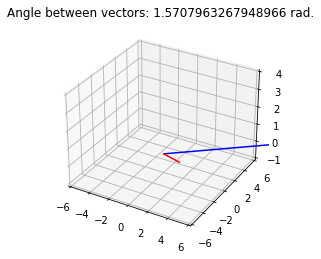

In [9]:

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# #quiz, Orthogonal?
v1 = np.array([ 16,  -2, 4 ])
v2 = np.array([ 0.5, 2, -1 ])

# compute the angle (radians) between two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) )
print(ang)


# draw them
fig = plt.figure()
# ax = fig.gca(projection='3d')  # error
ax = plt.subplot(projection='3d')
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title('Angle between vectors: %s rad.' %ang)
plt.show()


In [10]:
## equivalence of algebraic and geometric dot product formulas

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# #quiz, Orthogonal?
v1 = np.array([ 16,  -2, 4 ])
v2 = np.array([ 0.5, 2, -1 ])

# algebraic
dp_a = np.dot( v1,v2 )

# geometric
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)

# print dot product to command
print(dp_a)
print(dp_g)

0.0
2.330853880596675e-15


In [15]:
# Code Challenge: Cauchy-Schwarz inequality

# Create three vectors, one of which is dependent on another
a = np.random.rand(5)
b = np.random.rand(5)
c = np.random.rand(1) * a  # c is a scaled version of a: angle 0 or 180: (1, -1)

aTb = np.dot(a, b)
aTc = np.dot(a, c)

# demonstrate the (in)equalities
print(f'{np.abs(aTb):.4f}, {np.linalg.norm(a)*np.linalg.norm(b):.4f}')

# demonstrate the equality
print(f'{np.abs(aTc):.4f}, {np.linalg.norm(a)*np.linalg.norm(c):.4f}')

1.5649, 1.6663
1.0674, 1.0674


In [30]:
# Code Challenge: dot product sign and scalar multiplication
# test whether the dot product sign is invariant to scalar multiplication

# soft proof
v1 = np.array([-3, 4, 5])
v2 = np.array([3, 5, -3])

s1 = 2
s2 = 3

# compute dot product between the vectors
print('Original dot product: ' + str(np.dot(v1, v2)))

# compute dot product between scaled vectors
print('Scaled dot product: ' + str(np.dot(s1*v1, s2*v2)))

Original dot product: -4
Scaled dot product: -24



---
# VIDEO: Vector Hadamard multiplication
---


In [17]:

# create vectors
w1 = [ 1, 3, 5 ]
w2 = [ 3, 4, 2 ]

w3 = np.multiply(w1,w2)  # element-wise (Hardamard)
print(w3)


[ 3 12 10]



---
# VIDEO: Vector outer product
---


## Vector Product Notations

Dot(Inner) product
- V<sup>T</sup>W = 1 x 1,  V: (Nx1), W: (Nx1)

Outer product
- VW<sup>T</sup> = N x M,  V: (Nx1), W: (Mx1)

In [20]:

v1 = np.array([  1, 2, 3 ])
# v1 = np.array([  1, 2, 3, 4 ])  # works
v2 = np.array([ -1, 0, 1 ])

# outer product
print(np.outer(v1,v2))
print()

# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v2)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]



---
# VIDEO: Vector cross product
---


## Cross Product
- Defined only for two 3D vectors
- Result is another 3D vector
- [1, 2, 3] x [a, b, c] = [2c-3b, 3a-1c, 1b-2a]
- The cross product is the orthogonal vector on the plain defined by V1 and V2 -> Norm on the two vectors




[15 20  1] [[15], [20], [1]]


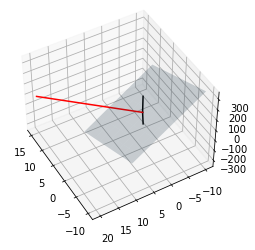

In [26]:
# create vectors
v1  = [ -3,  2, 5 ]
v2  = [  4, -3, 0 ]

# Python's cross-product function
v3a = np.cross( v1,v2 )

# "manual" method
v3b = [ [v1[1]*v2[2] - v1[2]*v2[1]],
        [v1[2]*v2[0] - v1[0]*v2[2]],
        [v1[0]*v2[1] - v1[1]*v2[0]] ]

print(v3a,v3b)


fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.subplot(projection='3d')

# draw plane defined by span of v1 and v2
xx, yy = np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10))
z1 = (-v3a[0]*xx - v3a[1]*yy)/v3a[2]
ax.plot_surface(xx,yy,z1,alpha=.2)

## plot the two vectors 
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'k')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'k')
ax.plot([0, v3a[0]],[0, v3a[1]],[0, v3a[2]], 'r')


ax.view_init(azim=150,elev=45)
plt.show()


---
# VIDEO: Hermitian transpose (a.k.a. conjugate transpose)
---


In [33]:
# create a complex number
# z = np.complex(3,4)
z = complex(3, 4)
print(z)

# magnitude
print( np.linalg.norm(z) )

# by transpose?
print( np.transpose(z)*z )  # this dot product does not make the length of the number

# by Hermitian transpose
print( np.transpose(z.conjugate())*z )  # This removes the imaginary numbers

(3+4j)
5.0
(-7+24j)
(25+0j)


In [32]:
# complex vector
# v = np.array( [ 3, 4j, 5+2j, np.complex(2,-5) ] )
v = np.array( [ 3, 4j, 5+2j, complex(2,-5) ] )
print(v)
print( v.T )
print( np.transpose(v) )
print( np.transpose(v.conjugate()) )

[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.-0.j 0.-4.j 5.-2.j 2.+5.j]



---
# VIDEO: Unit vector
---


[-3  6] 0.14907119849998599 [-0.4472136   0.89442719]


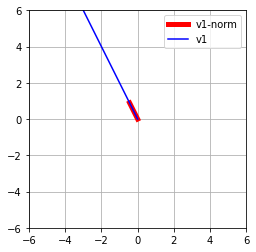

In [35]:

# vector
v1 = np.array([ -3, 6 ])

# mu
mu = 1/np.linalg.norm(v1)

v1n = v1*mu
print(v1, mu, v1n)

# plot them
plt.plot([0, v1n[0]],[0, v1n[1]],'r',label='v1-norm',linewidth=5)
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')

# axis square
plt.axis('square')
plt.axis(( -6, 6, -6, 6 ))
plt.grid()
plt.legend()
plt.show()

In [40]:
# Code Challenge: dot products with unit vectors

n = 4
v1 = np.round(20 * np.random.randn(n))
v2 = np.round(20 * np.random.randn(n))

# compute length of the individual vectors,
# and the magnitude of their dot product
v1m = np.sqrt(np.dot(v1, v1))
v2m = np.sqrt(np.dot(v2, v2))
dpm = np.abs(np.dot(v1, v2))  # dpm > v1m and dpm > v2m
print(v1m, v2m, dpm)
print()

# 'normalize' the vectors
v1u = v1/v1m
v2u = v2/v2m
print(v1u, v2u)
print()

# compute magnitude of that dot product
dpm = np.abs(np.dot(v1u, v2u))  # dpm < v1u and dpm < v2u, related to cosine similairty
print(dpm)



46.79743582719036 32.264531609803356 717.0

[-0.57695469 -0.14958085  0.72653553  0.34189907] [ 0.8988198  -0.43391301  0.         -0.06198757]

0.47486671937347713



---
# VIDEO: Span
---


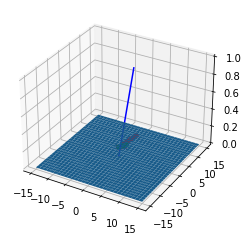

In [48]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])  # v = 4/6 S1 + 1/6 S2
w = np.array([3, 2, 1])  # w is not span of S, due to the 3rd 0s in S

# draw vectors
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = plt.subplot(projection='3d')
ax.plot([0, S1[0]],[0, S1[1]],[.1, S1[2]+.1],'r',linewidth=5)
ax.plot([0, S2[0]],[0, S2[1]],[.1, S2[2]+.1],'r',linewidth=5)

ax.plot([0, v[0]],[0, v[1]],[.1, v[2]+.1],'g',linewidth=5)
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

# now draw plane
xx, yy = np.meshgrid(range(-15,16), range(-15,16))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()